<h1><center><font size="6">Car Price Prediction</font></center></h1>




<img src="http://images.unsplash.com/photo-1503736334956-4c8f8e92946d?ixlib=rb-1.2.1&q=80&fm=jpg&crop=entropy&cs=tinysrgb&w=1080&fit=max&ixid=eyJhcHBfaWQiOjEyMDd9" width="800"></img>



<br>

# <a id='0'>Content</a>

- <a href='#1'>Importing Libraries and Modules</a>  
- <a href='#2'>Loading and Exploration</a>
- <a href='#3'>Visualizationss</a>   
- <a href='#4'>Cleaning Data</a>    
- <a href='#5'>Feature Engineering</a>     
- <a href='#6'>Model</a>
- <a href='#7'>Blending</a>

# <a id='1'>Importing Libraries and Modules</a> 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import plotly.plotly as py
from plotly.offline import init_notebook_mode,iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import os
print(os.listdir("../input/car-pred-results"))
import gc
from scipy.special import boxcox1p
import xgboost as xgb
import pickle
import lightgbm as lgb
seed=5
from xgboost import XGBRegressor


['seventeenth_sub_9460.csv', 'eleventh_sub_9452.csv', 'fourteenth_sub_9457.csv', 'twelth_sub_9453.csv']


# <a id='2'>Loading Data and Exploration</a> 

In [2]:
data=pd.read_excel('../input/machinehackused-cars-sales-price/Data_Train.xlsx')
test=pd.read_excel('../input/machinehackused-cars-sales-price/Data_Test.xlsx')
sub=pd.read_excel('../input/machinehackused-cars-sales-price/Sample_submission.xlsx')

In [3]:
data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [4]:
def get_nulldf(data):
    null_values=pd.Series(data.isnull().sum(),name='Null values')
    percent=pd.Series(np.round(data.isnull().sum()*100/len(data),3),name='Null values percentage')
    df=pd.concat([null_values,percent],axis=1)
    return df

In [5]:
train_nulldf=get_nulldf(data)

In [6]:
train_nulldf

,Null values,Null values percentage
Name,0,0.000
Location,0,0.000
Year,0,0.000
Kilometers_Driven,0,0.000
Fuel_Type,0,0.000
Transmission,0,0.000
Owner_Type,0,0.000
Mileage,2,0.033
Engine,36,0.598
Power,36,0.598


In [7]:
train_new_price=data.pop('New_Price')
test_new_price=test.pop('New_Price')

In [8]:
data=data.dropna(axis=0).reset_index(drop=True)

In [9]:
data.describe(include='O')

,Name,Location,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power
count,5975,5975,5975,5975,5975,5975,5975,5975
unique,1855,11,4,2,4,442,145,371
top,Mahindra XUV500 W8 2WD,Mumbai,Diesel,Manual,First,18.9 kmpl,1197 CC,74 bhp
freq,49,784,3195,4266,4903,172,606,235


In [10]:
data.describe()

,Year,Kilometers_Driven,Seats,Price
count,5975.000000,5.975000e+03,5975.000000,5975.000000
mean,2013.386778,5.867431e+04,5.278828,9.501647
std,3.247238,9.155851e+04,0.808959,11.205736
min,1998.000000,1.710000e+02,0.000000,0.440000
25%,2012.000000,3.390800e+04,5.000000,3.500000
50%,2014.000000,5.300000e+04,5.000000,5.650000
75%,2016.000000,7.300000e+04,5.000000,9.950000
max,2019.000000,6.500000e+06,10.000000,160.000000


In [11]:
test_nulldf=get_nulldf(test)
test_nulldf

,Null values,Null values percentage
Name,0,0.000
Location,0,0.000
Year,0,0.000
Kilometers_Driven,0,0.000
Fuel_Type,0,0.000
Transmission,0,0.000
Owner_Type,0,0.000
Mileage,0,0.000
Engine,10,0.810
Power,10,0.810


We need to drop 'New_Price' feature.

# <a id='3'>Visualizations</a> 

In [12]:
def get_bar_subplots(feature):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    sns.countplot(data[feature],ax=ax[0])
    ax[0].set_title(f'Counts of each unique value in {feature} : Train')
   
    
    sns.countplot(test[feature],ax=ax[1])
    ax[1].set_title(f'Counts of each unique value in {feature} : Test')

    
    plt.tight_layout()

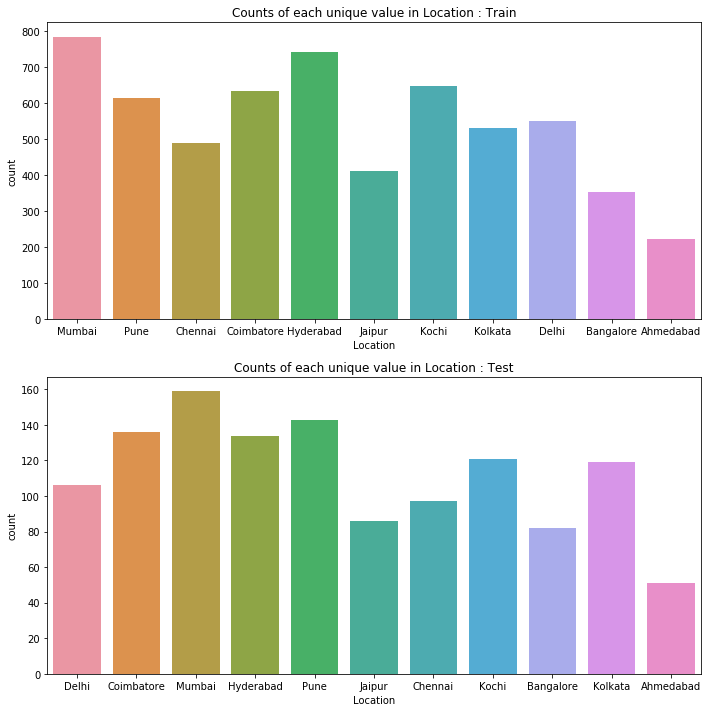

In [13]:
get_bar_subplots('Location')

[Text(0, 0, 'Mumbai'),
 Text(0, 0, 'Pune'),
 Text(0, 0, 'Chennai'),
 Text(0, 0, 'Coimbatore'),
 Text(0, 0, 'Hyderabad'),
 Text(0, 0, 'Jaipur'),
 Text(0, 0, 'Kochi'),
 Text(0, 0, 'Kolkata'),
 Text(0, 0, 'Delhi'),
 Text(0, 0, 'Bangalore'),
 Text(0, 0, 'Ahmedabad')]

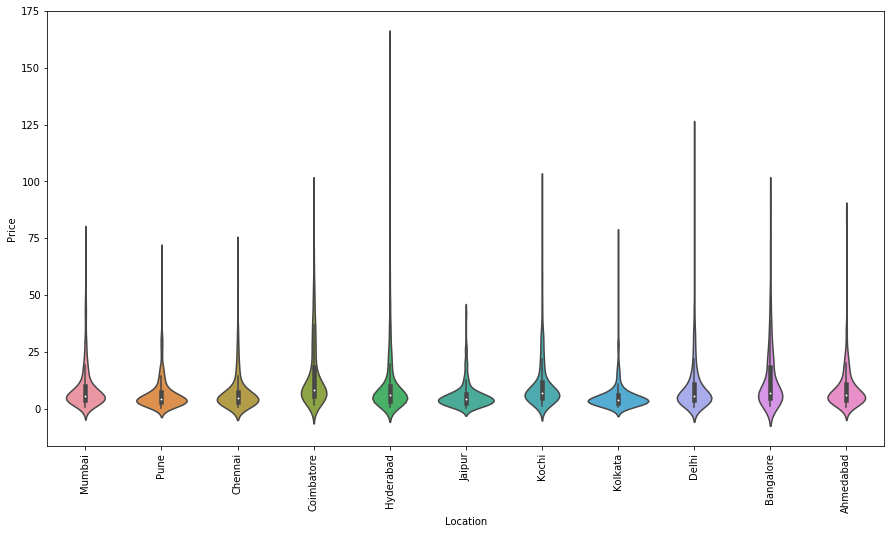

In [14]:
plt.figure(figsize=(15,8))
loc=sns.violinplot(x='Location',y='Price',data=data)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

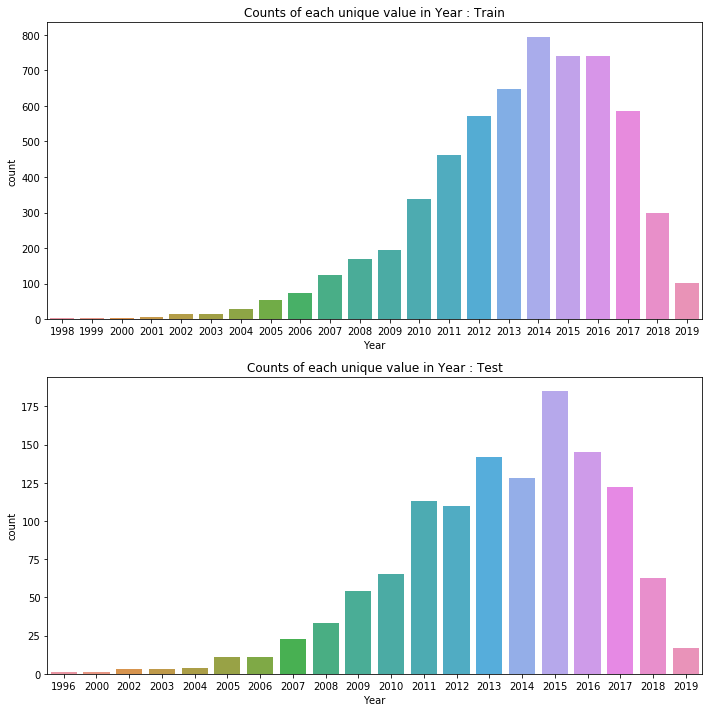

In [15]:
get_bar_subplots('Year')

[Text(0, 0, '1998'),
 Text(0, 0, '1999'),
 Text(0, 0, '2000'),
 Text(0, 0, '2001'),
 Text(0, 0, '2002'),
 Text(0, 0, '2003'),
 Text(0, 0, '2004'),
 Text(0, 0, '2005'),
 Text(0, 0, '2006'),
 Text(0, 0, '2007'),
 Text(0, 0, '2008'),
 Text(0, 0, '2009'),
 Text(0, 0, '2010'),
 Text(0, 0, '2011'),
 Text(0, 0, '2012'),
 Text(0, 0, '2013'),
 Text(0, 0, '2014'),
 Text(0, 0, '2015'),
 Text(0, 0, '2016'),
 Text(0, 0, '2017'),
 Text(0, 0, '2018'),
 Text(0, 0, '2019')]

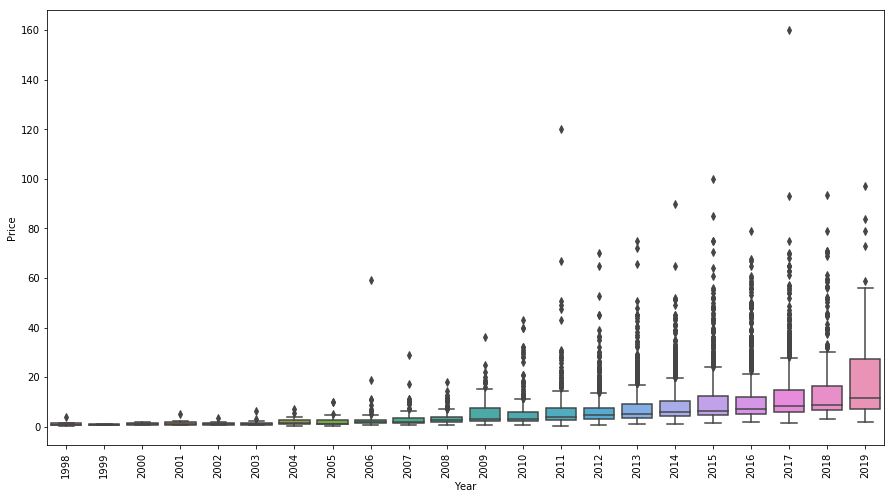

In [16]:
plt.figure(figsize=(15,8))
loc=sns.boxplot(x='Year',y='Price',data=data)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

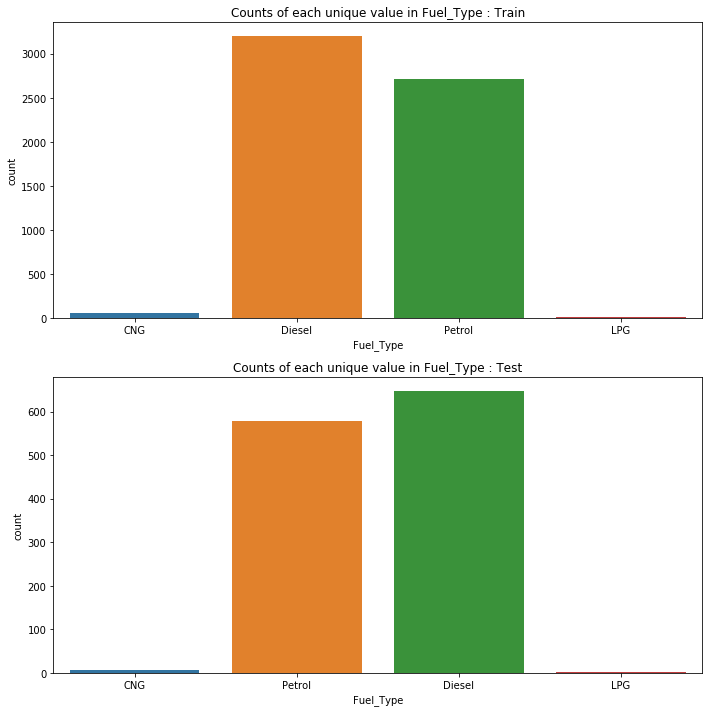

In [17]:
get_bar_subplots('Fuel_Type')

[Text(0, 0, 'CNG'),
 Text(0, 0, 'Diesel'),
 Text(0, 0, 'Petrol'),
 Text(0, 0, 'LPG')]

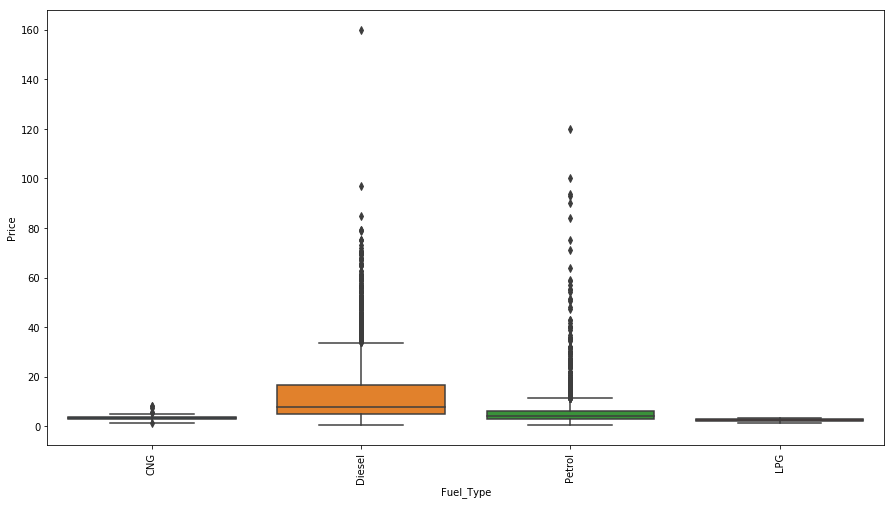

In [18]:
plt.figure(figsize=(15,8))
loc=sns.boxplot(x='Fuel_Type',y='Price',data=data)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

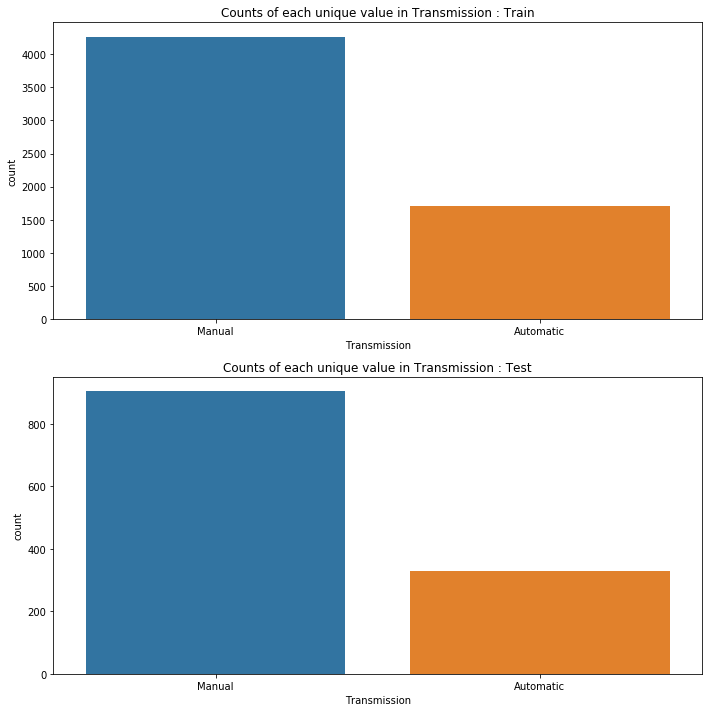

In [19]:
get_bar_subplots('Transmission')

[Text(0, 0, 'Manual'), Text(0, 0, 'Automatic')]

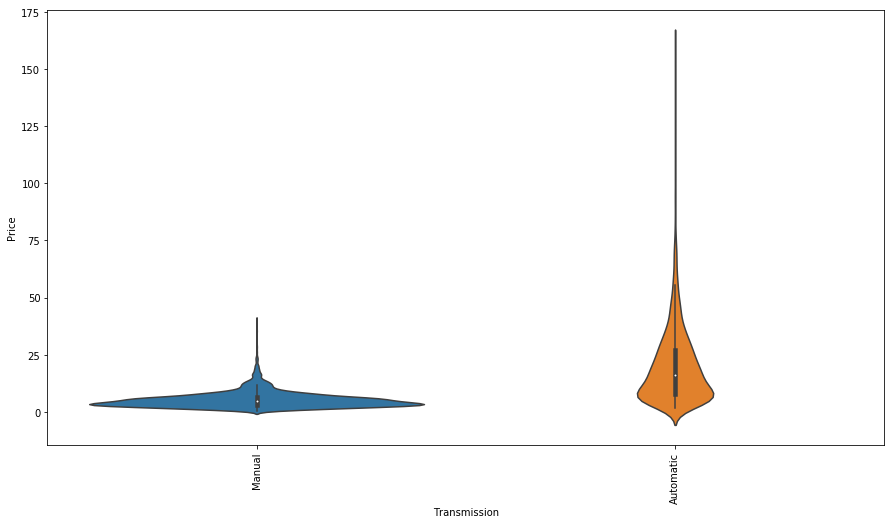

In [20]:
plt.figure(figsize=(15,8))
loc=sns.violinplot(x='Transmission',y='Price',data=data)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

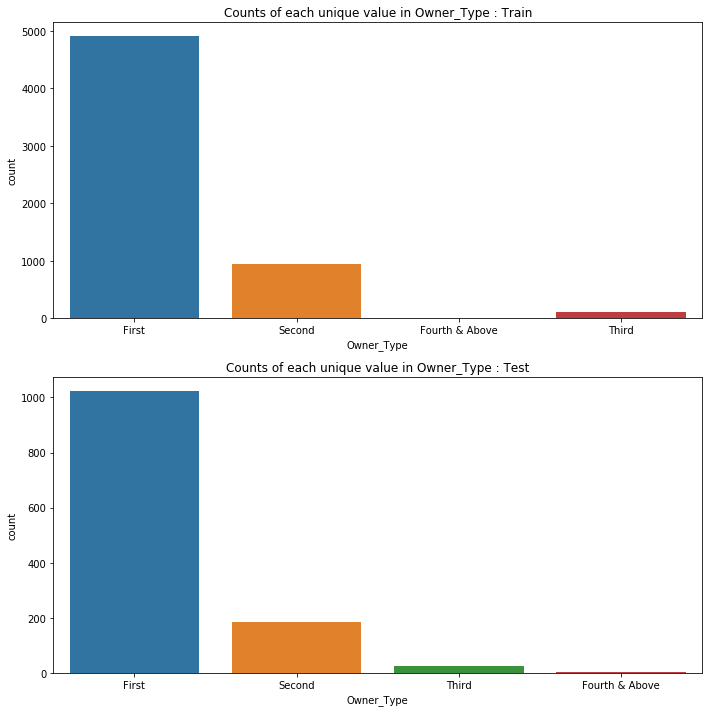

In [21]:
get_bar_subplots('Owner_Type')

[Text(0, 0, 'First'),
 Text(0, 0, 'Second'),
 Text(0, 0, 'Fourth & Above'),
 Text(0, 0, 'Third')]

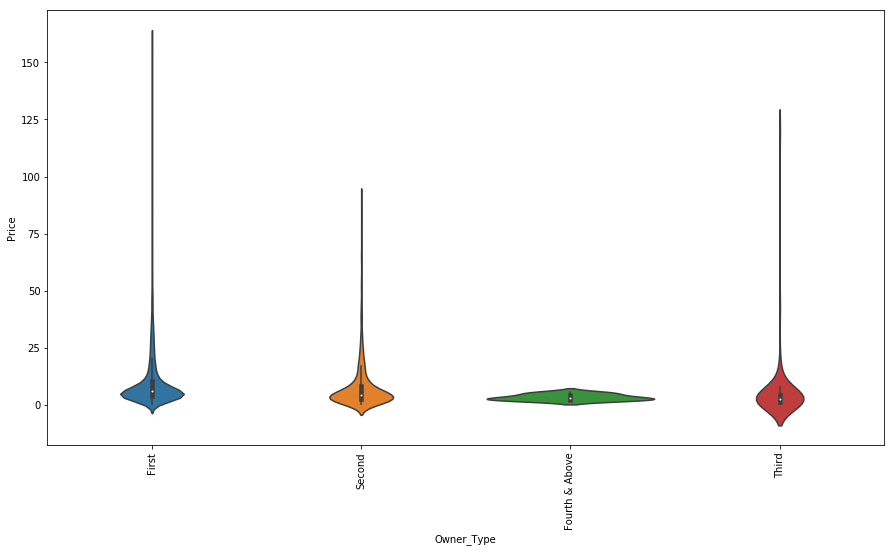

In [22]:
plt.figure(figsize=(15,8))
loc=sns.violinplot(x='Owner_Type',y='Price',data=data)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

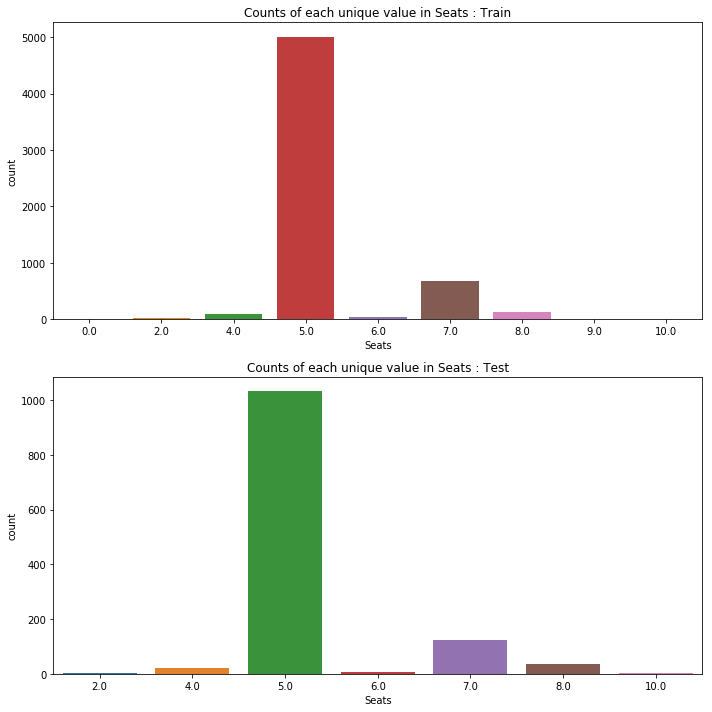

In [23]:
get_bar_subplots('Seats')

[Text(0, 0, '0.0'),
 Text(0, 0, '2.0'),
 Text(0, 0, '4.0'),
 Text(0, 0, '5.0'),
 Text(0, 0, '6.0'),
 Text(0, 0, '7.0'),
 Text(0, 0, '8.0'),
 Text(0, 0, '9.0'),
 Text(0, 0, '10.0')]

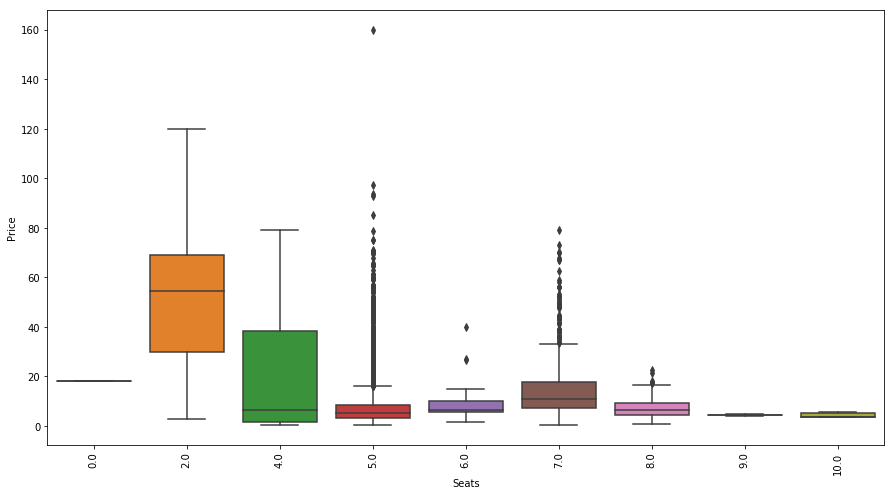

In [24]:
plt.figure(figsize=(15,8))
loc=sns.boxplot(x='Seats',y='Price',data=data)
loc.set_xticklabels(loc.get_xticklabels(),rotation=90)

In [25]:
def get_subplots(feature):
    fig,ax=plt.subplots(2,1,figsize=(10,10))
    sns.distplot(data[feature],ax=ax[0])
    ax[0].set_title(f'Distribution of {feature} : Train')
   
    
    sns.distplot(test[feature],ax=ax[1])
    ax[1].set_title(f'Distribution of {feature} : Test')

    
    plt.tight_layout()
    

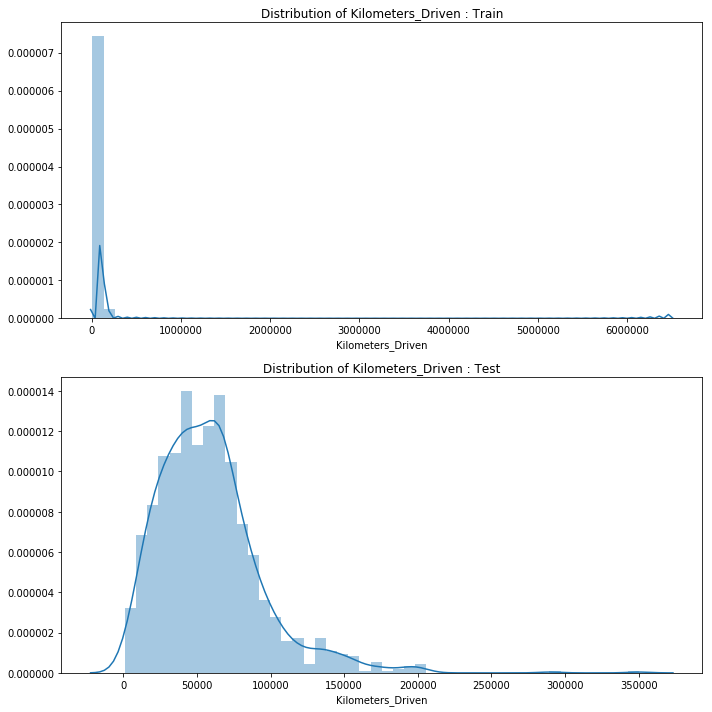

In [26]:
get_subplots('Kilometers_Driven')

Extreme outliers in this feature in Train dataset. Must be taken care of 

In [27]:
km_index=data[data['Kilometers_Driven']>=400000].index
data=data.drop(km_index,axis=0)

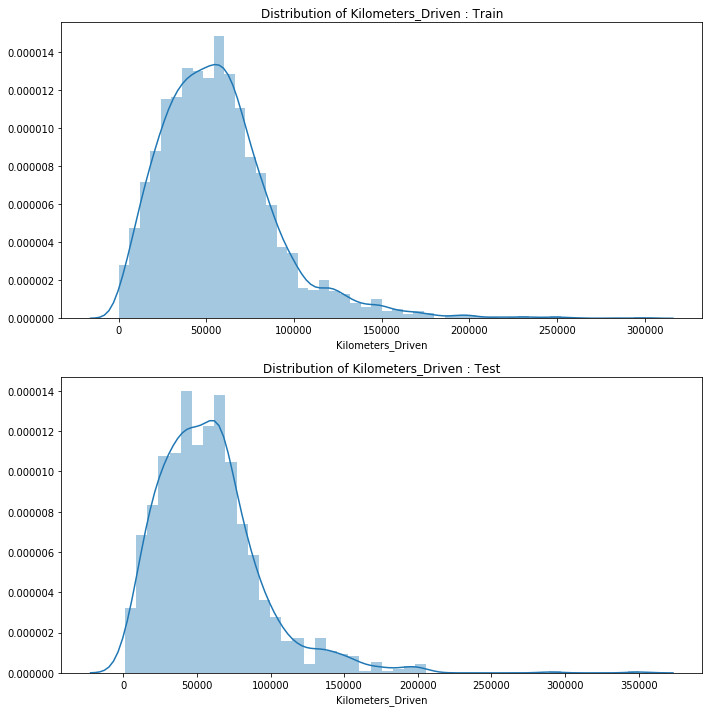

In [28]:
get_subplots('Kilometers_Driven')

In [29]:
price=data.pop('Price')

# <a id='4'>Cleaning Data</a> 

In [30]:
ntrain=data.shape[0]
all_data=pd.concat([data,test],ignore_index=True,axis=0)

In [31]:
all_data.isnull().sum()

Name                  0
Location              0
Year                  0
Kilometers_Driven     0
Fuel_Type             0
Transmission          0
Owner_Type            0
Mileage               0
Engine               10
Power                10
Seats                11
dtype: int64

In [32]:
all_data[all_data['Engine'].isna()]

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats
5991,Skoda Laura 1.8 TSI Ambition,Bangalore,2009,72000,Petrol,Manual,Second,17.5 kmpl,NaN,NaN,NaN
6490,Toyota Etios Liva Diesel TRD Sportivo,Bangalore,2012,56600,Diesel,Manual,First,23.59 kmpl,NaN,NaN,NaN
6493,Hyundai i20 new Sportz AT 1.4,Bangalore,2012,58000,Petrol,Automatic,Second,15.0 kmpl,NaN,NaN,NaN
6582,Mahindra TUV 300 P4,Kolkata,2016,27000,Diesel,Manual,First,0.0 kmpl,NaN,NaN,NaN
6592,BMW 5 Series 520d Sedan,Bangalore,2009,150000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN
6600,Maruti Swift 1.3 VXi,Kolkata,2015,36009,Petrol,Manual,First,16.1 kmpl,NaN,NaN,NaN
6626,Fiat Punto 1.4 Emotion,Jaipur,2010,65000,Petrol,Manual,Third,14.6 kmpl,NaN,NaN,NaN
6634,Maruti Swift 1.3 VXi,Pune,2010,115000,Petrol,Manual,Second,16.1 kmpl,NaN,NaN,NaN
6829,BMW 5 Series 520d Sedan,Chennai,2009,95000,Diesel,Automatic,Second,18.48 kmpl,NaN,NaN,NaN
6851,Toyota Etios Liva V,Kochi,2012,59311,Petrol,Manual,First,18.3 kmpl,NaN,NaN,NaN


Looked up on internet and filled them.

In [33]:
all_data.loc[5998,'Engine']='1798 CC'
all_data.loc[5998,'Power']='157.8 bhp'
all_data.loc[5998,'Seats']=5
all_data.loc[6497,'Engine']='1364 CC'
all_data.loc[6497,'Power']='67.04 bhp'
all_data.loc[6497,'Seats']=5
all_data.loc[6500,'Engine']='1197 CC'
all_data.loc[6500,'Power']='88.76 bhp'
all_data.loc[6500,'Seats']=5
all_data.loc[6589,'Engine']='1493 CC'
all_data.loc[6589,'Power']='100 bhp'
all_data.loc[6589,'Seats']=5
all_data.loc[6599,'Engine']='2500 CC'
all_data.loc[6599,'Power']='265 bhp'
all_data.loc[6599,'Seats']=5
all_data.loc[6607,'Engine']='1197 CC'
all_data.loc[6607,'Power']='74 bhp'
all_data.loc[6607,'Seats']=5
all_data.loc[6633,'Engine']='1172 CC'
all_data.loc[6633,'Power']='91.7 bhp'
all_data.loc[6633,'Seats']=5
all_data.loc[6641,'Engine']='1197 CC'
all_data.loc[6641,'Power']='74 bhp'
all_data.loc[6641,'Seats']=5
all_data.loc[6836,'Engine']='2500 CC'
all_data.loc[6836,'Power']='265 bhp'
all_data.loc[6836,'Seats']=5
all_data.loc[6858,'Engine']='1496 CC'
all_data.loc[6858,'Power']='67.04 bhp'
all_data.loc[6858,'Seats']=5
all_data.loc[6913,'Seats']=5

In [34]:
all_data['Company']=all_data['Name'].apply(lambda x: str(x).split()[0])
all_data['Car']=all_data['Name'].apply(lambda x: str(x).split()[1])
all_data['Mileage']=all_data['Mileage'].apply(lambda x: str(x).split()[0])
all_data['Engine']=all_data['Engine'].astype(object)
all_data['Engine']=all_data['Engine'].apply(lambda x: str(x).split()[0])
all_data['Power']=all_data['Power'].apply(lambda x: str(x).split()[0])
all_data['Year']=all_data['Year'].apply(lambda x: 2019-x)
car_names=list(all_data['Name'].values)
all_data['Len']=pd.Series(len(x.split()) for x in car_names)
all_data=all_data.drop('Name',axis=1)

In [35]:
all_data['Power']=all_data['Power'].replace('null',all_data['Power'].mode()[0])
all_data['Mileage']=all_data['Mileage'].replace('0.0',all_data['Mileage'].mode()[0])
all_data['Engine']=all_data['Engine'].replace('nan',all_data['Engine'].mode()[0])
all_data['Power']=all_data['Power'].replace('nan',all_data['Engine'].mode()[0])
all_data['Seats']=all_data['Seats'].fillna(all_data['Seats'].mode()[0])

In [36]:
object_cols=['Mileage','Power','Engine']
for col in object_cols:
    all_data[col]=all_data[col].astype(float)

In [37]:
all_data['Year']=all_data['Year'].astype(int)
all_data['Seats']=all_data['Seats'].astype(int)

In [38]:
data=all_data[:ntrain]
test=all_data[ntrain:]

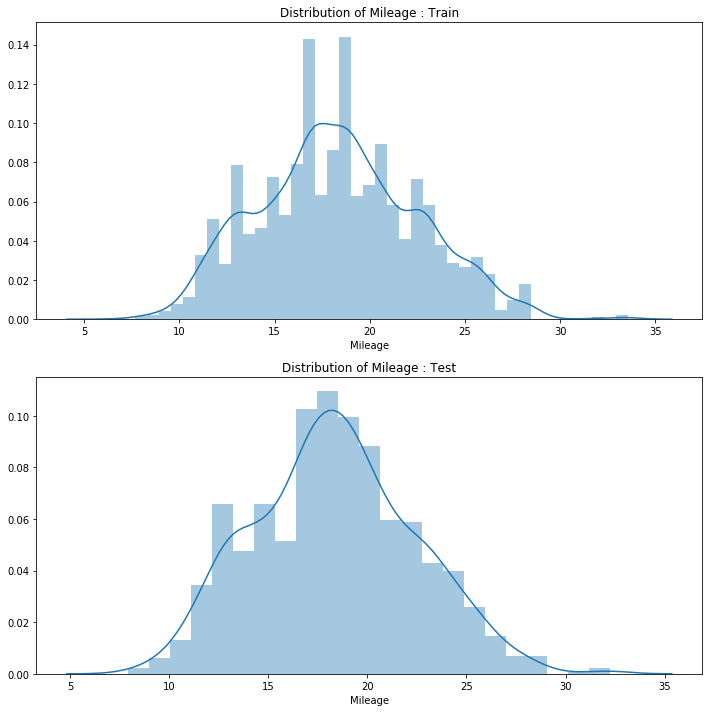

In [39]:
get_subplots('Mileage')

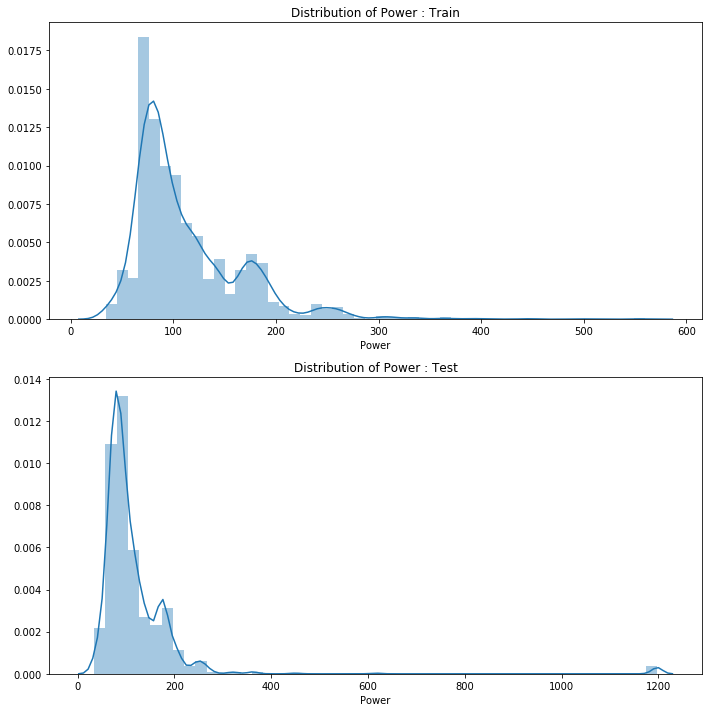

In [40]:
get_subplots('Power')

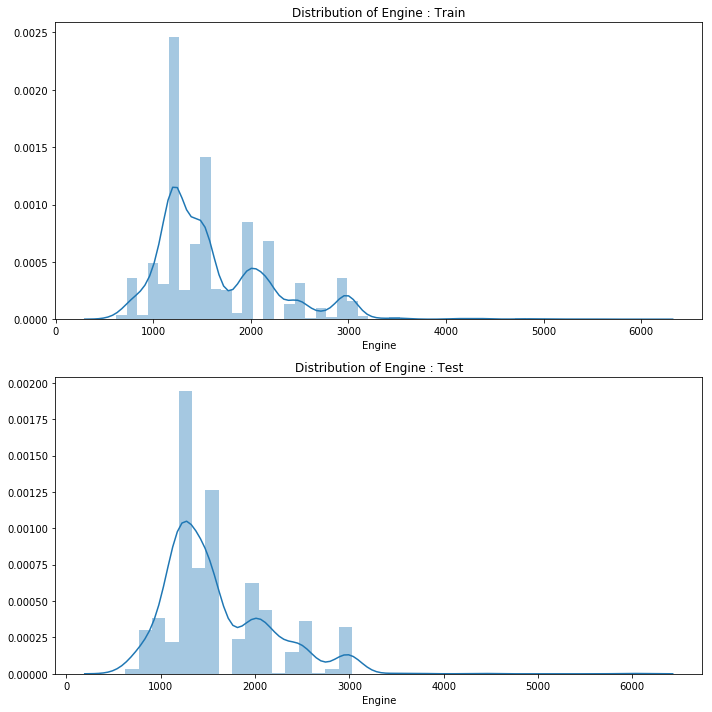

In [41]:
get_subplots('Engine')

# <a id='5'>Feature Engineering</a> 

In [42]:
# def get_means(data1,data2,cols):
#     for col in cols:
#         df=data1.groupby(col)['Price'].mean().reset_index()
#         df.columns=[col,col+'_Mean']
#         df[col]=df[col].astype(object)
#         data2=pd.merge(data2,df,on=col,how='left')
#     return data2
    

In [43]:
cols=['Kilometers_Driven','Engine','Power']

print(all_data[cols].skew())

Kilometers_Driven    1.501310
Engine               1.418744
Power                6.871885
dtype: float64


In [44]:
lam=0.15
for col in cols:
    all_data[col]=boxcox1p(all_data[col],lam)

In [45]:
# cont_cols=['Kilometers_Driven','Mileage','Engine','Power']
# cat_cols=['Location','Year','Fuel_Type','Transmission','Owner_Type','Seats','Company','Car']

# for col in cont_cols:
#     for feat in cat_cols:
#         all_data[f'{col}_mean_group_{feat}']=all_data[col]/all_data.groupby(feat)[col].transform('mean')
#         all_data[f'{col}_max_group_{feat}']=all_data[col]/all_data.groupby(feat)[col].transform('max')
#         all_data[f'{col}_min_group_{feat}']=all_data[col]/all_data.groupby(feat)[col].transform('min')
#         all_data[f'{col}_skew_group_{feat}']=all_data[col]/all_data.groupby(feat)[col].transform('skew')
        

In [46]:
price=np.log1p(price)

In [47]:
all_data.isnull().sum()

Location             0
Year                 0
Kilometers_Driven    0
Fuel_Type            0
Transmission         0
Owner_Type           0
Mileage              0
Engine               0
Power                0
Seats                0
Company              0
Car                  0
Len                  0
dtype: int64

In [48]:
# top_cars=all_data['Car'].value_counts()[:20].index
# for t in top_cars:
#     all_data['is_'+t]=all_data['Car'].apply(lambda x: 1 if x==t else 0)

In [49]:
# top_companies=all_data['Company'].value_counts()[:20].index
# for c in top_companies:
#     all_data['is_'+c]=all_data['Company'].apply(lambda x: 1 if x==c else 0)

In [50]:
# from sklearn.preprocessing import LabelEncoder
# cols=['Location','Owner_Type','Fuel_Type','Transmission','Seats','Car','Company']

# for col in cols:
#     le=LabelEncoder()
#     all_data[col]=le.fit_transform(all_data[col])

In [51]:
cols=['Location','Owner_Type','Fuel_Type','Transmission','Seats','Car','Company']
X=pd.get_dummies(all_data[cols])
all_data.drop(cols,axis=1,inplace=True)
all_data=pd.concat([all_data,X],axis=1)

In [52]:
all_data.shape

(7202, 277)

In [53]:
all_data.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Len,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_1,Car_1.4Gsi,Car_1000,Car_3,Car_370Z,Car_5,Car_6,Car_7,Car_800,Car_A,Car_A-Star,Car_A3,...,Car_Yeti,Car_Z4,Car_Zen,Car_Zest,Car_i10,Car_i20,Car_redi-GO,Company_Ambassador,Company_Audi,Company_BMW,Company_Bentley,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Hindustan,Company_Honda,Company_Hyundai,Company_ISUZU,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Lamborghini,Company_Land,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_OpelCorsa,Company_Porsche,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,9,29.020291,26.60,12.119733,5.627893,5,5,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,26.129864,19.67,13.462736,7.123890,6,5,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,26.700846,18.20,12.643496,6.419957,3,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,30.047813,20.77,12.759768,6.421269,3,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,26.090133,15.20,14.132484,7.350498,6,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [54]:
object_cols=['Mileage','Power','Engine']
for col in object_cols:
    all_data[col]=all_data[col].astype(float)

In [55]:
train=all_data[:ntrain]
test=all_data[ntrain:]

In [56]:
test.shape

(1234, 277)

# <a id='6'>Model</a> 

In [57]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer,mean_squared_log_error
def rmsle(y, y0):
    return np.sqrt(np.mean(np.square(np.log1p(y) - np.log1p(y0))))


scorer=make_scorer(rmsle,greater_is_better=False)


def do_grid(model,params,cv=3):
    my_model=model
    grid=GridSearchCV(my_model,params,cv=cv,scoring=scorer)
    grid.fit(train,price)
    best_params=grid.best_params_
    best_score=grid.best_score_
    
    return best_score,best_params

In [58]:

import time

start=time.time()
params={'n_estimators':[2500,3000],
        'learning_rate':[0.08],
        'colsample_bytree':[0.3],
        'subsample':[0.6],
       'early_stopping_rounds':[10],
       'tree_method':['gpu_hist'],
        'max_depth':[3],
       'verbosity':[0]}

xgb_score,xgb_params=do_grid(XGBRegressor(random_state=seed),params)
end=time.time()

In [59]:
print(end-start)
print(xgb_params)
print(xgb_score)

39.35812187194824
{'colsample_bytree': 0.3, 'early_stopping_rounds': 10, 'learning_rate': 0.08, 'max_depth': 3, 'n_estimators': 3000, 'subsample': 0.6, 'tree_method': 'gpu_hist', 'verbosity': 0}
-0.04752660753272359


In [60]:
# from hyperopt import tpe,hp,Trials
# from hyperopt.fmin import fmin 

# def objective(params):
#     params=dict(max_depth=int(params['max_depth']),
#                subsample=np.round(params['subsample'],3),
#                colsample_bytree=np.round(params['colsample_bytree'],3),
#                random_state=seed,
#                tree_method='gpu_hist')
    
#     train_d=xgb.DMatrix(train_X,label=train_y)
#     val_d=xgb.DMatrix(val_X,val_y)
    
#     model=xgb.train(params,train_d,evals=[(val_d,'validation')],num_boost_round=1000,early_stopping_rounds=20)
#     val_pred=model.predict(xgb.DMatrix(val_X))
#     score=rmsle(val_y,val_pred)
#     return score

# space={'max_depth':hp.quniform('max_depth',3,10,1),
#       'subsample':hp.uniform('subsample',0.1,1),
#       'colsample_bytree':hp.uniform('colsample_bytree',0.1,1)}

# trial=Trials()
# best=fmin(objective,space=space,trials=trial,algo=tpe.suggest,max_evals=100)

In [61]:
# import time

# start=time.time()
# params={'n_estimators':[500],
#         'max_depth':[-1],
#         'learning_rate':[0.1],
#        'num_leaves':[20],
#        'subsample':[0.1],
#        'colsample_bytree':[0.3]}

# lgb_score,lgb_params=do_grid(LGBMRegressor(random_state=seed),params)
# end=time.time()

In [62]:
# print(lgb_params)
# print(lgb_score)

In [63]:
# import time
# from catboost import CatBoostRegressor

# start=time.time()
# params={'iterations':[1500,1750,2000],
#         'depth':[3,4,5],
#        'verbose':[0]}

# cat_score,cat_params=do_grid(CatBoostRegressor(random_state=seed),params)
# end=time.time()

In [64]:
# print(cat_params)
# print(cat_score)

In [65]:
train.head()

,Year,Kilometers_Driven,Mileage,Engine,Power,Len,Seats,Location_Ahmedabad,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Owner_Type_First,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Fuel_Type_CNG,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Automatic,Transmission_Manual,Car_1,Car_1.4Gsi,Car_1000,Car_3,Car_370Z,Car_5,Car_6,Car_7,Car_800,Car_A,Car_A-Star,Car_A3,...,Car_Yeti,Car_Z4,Car_Zen,Car_Zest,Car_i10,Car_i20,Car_redi-GO,Company_Ambassador,Company_Audi,Company_BMW,Company_Bentley,Company_Chevrolet,Company_Datsun,Company_Fiat,Company_Force,Company_Ford,Company_Hindustan,Company_Honda,Company_Hyundai,Company_ISUZU,Company_Isuzu,Company_Jaguar,Company_Jeep,Company_Lamborghini,Company_Land,Company_Mahindra,Company_Maruti,Company_Mercedes-Benz,Company_Mini,Company_Mitsubishi,Company_Nissan,Company_OpelCorsa,Company_Porsche,Company_Renault,Company_Skoda,Company_Smart,Company_Tata,Company_Toyota,Company_Volkswagen,Company_Volvo
0,9,29.020291,26.60,12.119733,5.627893,5,5,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,4,26.129864,19.67,13.462736,7.123890,6,5,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,8,26.700846,18.20,12.643496,6.419957,3,5,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,7,30.047813,20.77,12.759768,6.421269,3,7,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,6,26.090133,15.20,14.132484,7.350498,6,5,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Fold 1
[13:08:26] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for fold 1 is : nan
Fold 2
[13:08:30] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for fold 2 is : nan
Fold 3
[13:08:35] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for fold 3 is : nan
Fold 4
[13:08:39] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for fold 4 is : nan
Fold 5
[13:08:43] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for fold 5 is : nan
Fold 6
[13:08:48] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
RMSLE for fold 6 is : nan
Fold 7
[13:08:52] WARNING: /workspace/sr

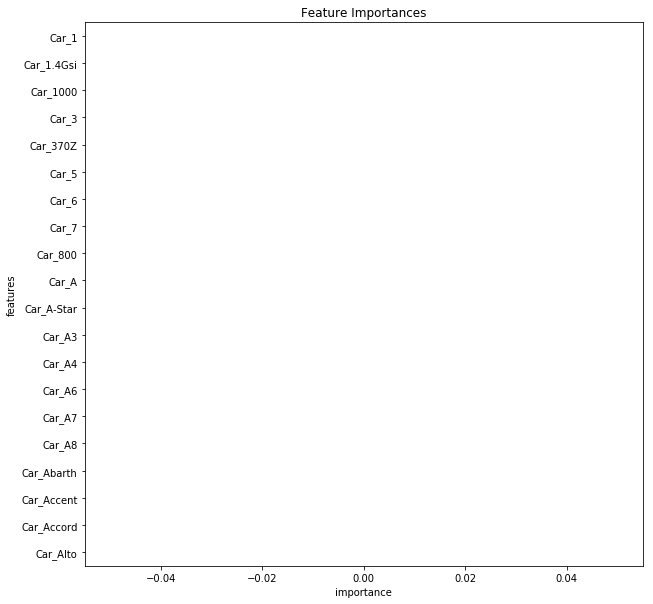

In [66]:
from sklearn.model_selection import KFold
import xgboost as xgb

nfolds=10
kfold=KFold(nfolds,random_state=seed)
oof=np.zeros(train.shape[0])
pred=np.zeros(test.shape[0])
feat_importance=pd.DataFrame()
scores=[]


for i,(train_idx,val_idx) in enumerate(kfold.split(train,price)):
    print('Fold {}'.format(i+1))
    
    train_X,val_X=train.iloc[train_idx,:],train.iloc[val_idx,:]
    train_y,val_y=price[train_idx],price[val_idx]
    model=XGBRegressor(max_depth=3,n_estimators=2500,subsample=0.6,colsample_bytree=0.8,learning_rate=0.08,random_state=seed,
                      tree_method='gpu_hist')
    model.fit(train_X,train_y)
    val_pred=model.predict(val_X)
    oof[val_idx]=val_pred
    score=rmsle(val_y,val_pred)
    print(f'RMSLE for fold {i+1} is :',score)
    scores.append(score)
    pred+=model.predict(test)/nfolds
    
    fold_importance=pd.DataFrame()
    fold_importance['features']=train.columns
    fold_importance['importance']=model.feature_importances_
    fold_importance['fold']=i+1
    feat_importance=pd.concat([feat_importance,fold_importance],axis=0)
    
print('Mean RMSLE is :',np.mean(scores))

df=feat_importance[['features','importance']].groupby('features').mean().reset_index().sort_values('importance',ascending=False)
df=df.iloc[:20,:]
plt.figure(figsize=(10,10))
plt.title('Feature Importances')
sns.barplot(x='importance',y='features',data=df)

In [67]:
train_X.values

array([[ 9.        , 29.02029055, 26.6       , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.        , 26.12986426, 19.67      , ...,  0.        ,
         0.        ,  0.        ],
       [ 8.        , 26.70084584, 18.2       , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 3.        , 29.7713764 , 14.28      , ...,  1.        ,
         0.        ,  0.        ],
       [ 3.        , 22.55636103, 21.76      , ...,  0.        ,
         0.        ,  0.        ],
       [ 1.        , 21.21801221, 18.88      , ...,  0.        ,
         0.        ,  0.        ]])

In [68]:
sub['Price']=np.exp(pred)-1
sub.to_csv('submission.csv',index=False)

# <a id='7'>Blending</a> 

In [69]:
sub1=pd.read_csv('../input/car-pred-results/seventeenth_sub_9460.csv')
sub2=pd.read_csv('../input/car-pred-results/fourteenth_sub_9457.csv')
sub3=pd.read_csv('../input/car-pred-results/twelth_sub_9453.csv')
sub4=pd.read_csv('../input/car-pred-results/eleventh_sub_9452.csv')

In [70]:
sub['Price']=0.25*(sub1+sub2+sub3+sub4)
sub.to_csv('blend1.csv',index=False)